As the training and production data are from a private commercial data provider, we prepared a subset of NOAA data to aid in experimentation and examples. This data can be found on hugging face at hherzog/atlantes-noaa-dataset. The data is stored in a zip file and should be downloaded to access the data. The zip file contains trackfiles which are the individual trajectory samples and a metadata index associating the trackfiles to metadata. All the data is from January and February 2023.

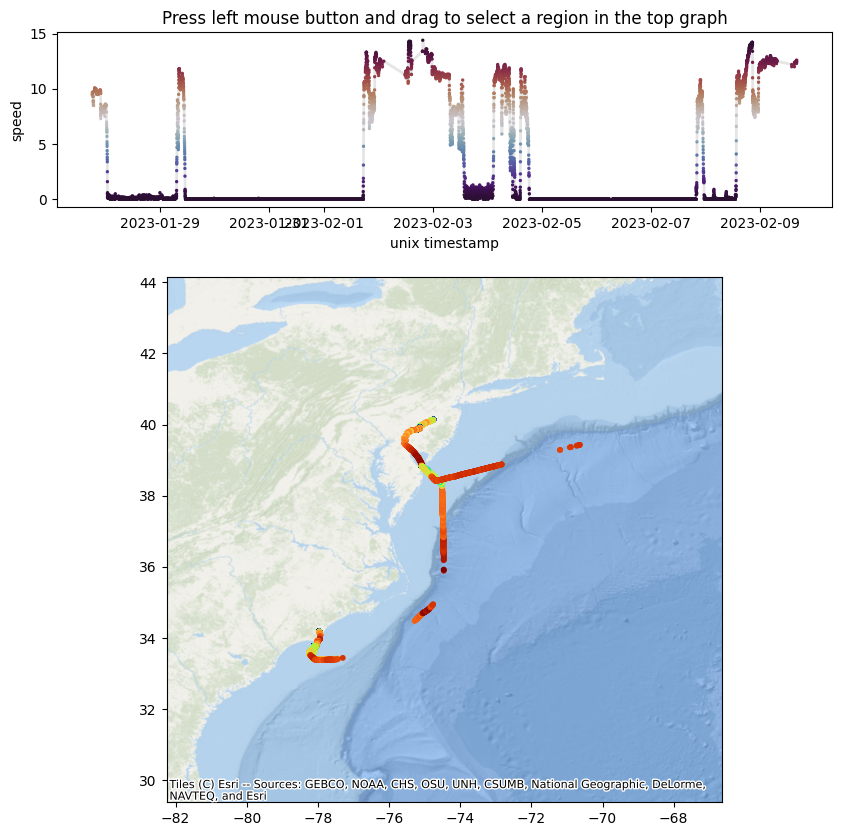

In [14]:
import pandas as pd
from atlantes.visualize_single_track import plot_ais_track

bucket_name = "ais-track-data"
df = pd.read_csv(f"gs://{bucket_name}/noaa_tracks/tracks_with_d2c/track_mmsi_212049000.csv")
plot_ais_track(df)

In [1]:
import os
# ONLY RUN ONCE!!
os.chdir("../")
print(os.getcwd())

/Users/henryh/Desktop/eai-repos/atlantes/ais


In [2]:
from atlantes.inference.atlas_activity.pipeline import AtlasActivityClassifier
from atlantes.inference.atlas_activity.preprocessor import AtlasActivityPreprocessor
from atlantes.inference.atlas_activity.model import AtlasActivityModel
from atlantes.inference.atlas_activity.postprocessor import AtlasActivityPostProcessor

# Instantiate the classifier

classifier = AtlasActivityClassifier(AtlasActivityPreprocessor(), AtlasActivityModel(), AtlasActivityPostProcessor())


format=2025-01-12 21:48:55,232 loglevel=INFO   logger=atlantes.atlas.ais_dataset <module>() L47   Setting warnings to ignore FutureWarnings
format=2025-01-12 21:48:55,734 loglevel=INFO   logger=ray.serve _get_device() L124  No GPU detected, using CPU


2025-01-12 21:48:55,734	INFO model.py:124 -- No GPU detected, using CPU


format=2025-01-12 21:48:55,735 loglevel=INFO   logger=ray.serve _get_device() L126  No GPUs available for ray serve.


2025-01-12 21:48:55,735	INFO model.py:126 -- No GPUs available for ray serve.


format=2025-01-12 21:48:55,735 loglevel=DEBUG  logger=atlantes.atlas.atlas_net __init__() L76   Using CPE layers
format=2025-01-12 21:48:55,796 loglevel=DEBUG  logger=ray.serve _load_atlas_activity_model() L109  Number of parameters in model: 4742196


2025-01-12 21:48:55,796	DEBUG model.py:109 -- Number of parameters in model: 4742196


format=2025-01-12 21:48:55,797 loglevel=DEBUG  logger=ray.serve _load_atlas_activity_model() L110  model memory size (MB): 18.090042114257812


2025-01-12 21:48:55,797	DEBUG model.py:110 -- model memory size (MB): 18.090042114257812


In [4]:
# Predict activity at most recent timestamp

predicted_activity = classifier.run_pipeline(df)

print(predicted_activity)

format=2025-01-12 21:50:03,052 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:50:03,052	INFO model.py:161 -- Running inference on the ATLAS activity model
/Users/henryh/atlantes/lib/python3.11/site-packages/torch/nn/modules/transformer.py:380: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/NestedTensorImpl.cpp:180.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


format=2025-01-12 21:50:03,620 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:50:03,620	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:50:03,621 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:50:03,621	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:50:03,621 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:50:03,621	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:50:03,624 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:50:03,624	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:50:03,624 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:50:03,624	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


('anchored', {'model': 'ATLAS-Activity-Real-Time_no_git_hash_2024-09-06-19-56-12_epoch2.pt', 'confidence': 0.7744460701942444, 'outputs': [0.7744460701942444, 0.0002315510791959241, 0.00023757740564178675, 0.22508487105369568], 'model_version': '9a93563_2025-01-12_21-48-55', 'original_classification': 'fishing', 'postprocessed_classification': 'anchored', 'rule_applied': 'num_anchored_vessels_classifed_as_fishing'})


In [5]:
# Predict activity most recently befor given timestamp
cropped_df = df[df['send'] < pd.Timestamp('2023-02-02 00:00:00')]
predicted_activity = classifier.run_pipeline(cropped_df)
print(predicted_activity)


format=2025-01-12 21:52:00,060 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:52:00,060	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:52:00,607 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:52:00,607	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:52:00,608 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:52:00,608	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:52:00,608 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[0.0, 0.0, 0.0, 0.0, 0.0]


2025-01-12 21:52:00,608	DEBUG postprocessor.py:474 -- last_5_sog_messages=[0.0, 0.0, 0.0, 0.0, 0.0]


format=2025-01-12 21:52:00,612 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L169  Moored rule applied.


2025-01-12 21:52:00,612	INFO postprocessor.py:169 -- Moored rule applied.


format=2025-01-12 21:52:00,613 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> moored


2025-01-12 21:52:00,613	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> moored


('moored', {'model': 'ATLAS-Activity-Real-Time_no_git_hash_2024-09-06-19-56-12_epoch2.pt', 'confidence': 0.852841317653656, 'outputs': [0.852841317653656, 0.00012141251499997452, 0.00017356760508846492, 0.1468636840581894], 'model_version': '9a93563_2025-01-12_21-48-55', 'original_classification': 'fishing', 'postprocessed_classification': 'moored', 'rule_applied': 'num_anchored_vessels_classifed_as_fishing'})


In [10]:
# Predict activity sequentially for a bunch of messages
clasifications = []
activities = []
length_df = len(df)
print(length_df)
num_messages = 10
for i in range(num_messages):
    activity, details = classifier.run_pipeline(df.iloc[length_df-1000 + i:])
    clasifications.append((activity, details))
    activities.append(activity)

print(activities)

7577
format=2025-01-12 21:59:20,557 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:20,557	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:20,766 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:20,766	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:20,766 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:20,766	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:20,767 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:20,767	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:20,769 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:20,769	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:20,770 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:20,770	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:20,798 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:20,798	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:21,008 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:21,008	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:21,008 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:21,008	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:21,009 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:21,009	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:21,011 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:21,011	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:21,012 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:21,012	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:21,036 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:21,036	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:21,241 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:21,241	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:21,242 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:21,242	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:21,242 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:21,242	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:21,245 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:21,245	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:21,246 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:21,246	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:21,275 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:21,275	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:21,509 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:21,509	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:21,510 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:21,510	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:21,511 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:21,511	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:21,514 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:21,514	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:21,514 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:21,514	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:21,544 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:21,544	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:21,805 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:21,805	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:21,806 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:21,806	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:21,806 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:21,806	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:21,809 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:21,809	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:21,810 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:21,810	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:21,836 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:21,836	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:22,039 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:22,039	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:22,039 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:22,039	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:22,040 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:22,040	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:22,043 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:22,043	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:22,043 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:22,043	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:22,068 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:22,068	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:22,268 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:22,268	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:22,269 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:22,269	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:22,269 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:22,269	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:22,272 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:22,272	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:22,272 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:22,272	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:22,300 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:22,300	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:22,525 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:22,525	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:22,526 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:22,526	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:22,526 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:22,526	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:22,528 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:22,528	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:22,528 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:22,528	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:22,560 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:22,560	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:22,786 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:22,786	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:22,786 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:22,786	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:22,787 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:22,787	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:22,789 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:22,789	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:22,790 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:22,790	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


format=2025-01-12 21:59:22,816 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 21:59:22,816	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 21:59:23,024 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 21:59:23,024	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 21:59:23,025 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 21:59:23,025	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 21:59:23,026 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


2025-01-12 21:59:23,026	DEBUG postprocessor.py:474 -- last_5_sog_messages=[1.9548888871999999, 1.4404444431999999, 1.28611111, 0.9774444435999999, 0.051444444400000004]


format=2025-01-12 21:59:23,028 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L160  Anchored rule applied.


2025-01-12 21:59:23,028	INFO postprocessor.py:160 -- Anchored rule applied.


format=2025-01-12 21:59:23,029 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> anchored


2025-01-12 21:59:23,029	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> anchored


['anchored', 'anchored', 'anchored', 'anchored', 'anchored', 'anchored', 'anchored', 'anchored', 'anchored', 'anchored']


format=2025-01-12 22:06:23,077 loglevel=INFO   logger=ray.serve run_inference() L161  Running inference on the ATLAS activity model


2025-01-12 22:06:23,077	INFO model.py:161 -- Running inference on the ATLAS activity model


format=2025-01-12 22:06:23,618 loglevel=DEBUG  logger=ray.serve is_transiting() L472  medium_fast_and_straight=False


2025-01-12 22:06:23,618	DEBUG postprocessor.py:472 -- medium_fast_and_straight=False


format=2025-01-12 22:06:23,618 loglevel=DEBUG  logger=ray.serve is_transiting() L473  very_fast=False


2025-01-12 22:06:23,618	DEBUG postprocessor.py:473 -- very_fast=False


format=2025-01-12 22:06:23,619 loglevel=DEBUG  logger=ray.serve is_transiting() L474  last_5_sog_messages=[0.0, 0.0, 0.0, 0.0, 0.0]


2025-01-12 22:06:23,619	DEBUG postprocessor.py:474 -- last_5_sog_messages=[0.0, 0.0, 0.0, 0.0, 0.0]


format=2025-01-12 22:06:23,623 loglevel=INFO   logger=ray.serve determine_postprocessed_activity_class() L169  Moored rule applied.


2025-01-12 22:06:23,623	INFO postprocessor.py:169 -- Moored rule applied.


format=2025-01-12 22:06:23,623 loglevel=INFO   logger=ray.serve postprocess() L646  Original Activity Prediction: fishing -> moored


2025-01-12 22:06:23,623	INFO postprocessor.py:646 -- Original Activity Prediction: fishing -> moored


moored


/Users/henryh/Desktop/eai-repos/eai/ais/src/atlantes/visualize_single_track.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["send"] = pd.to_datetime(df["send"])
/Users/henryh/Desktop/eai-repos/eai/ais/src/atlantes/visualize_single_track.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unixDateTime"] = df.apply(
/Users/henryh/Desktop/eai-repos/eai/ais/src/atlantes/visualize_single_track.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

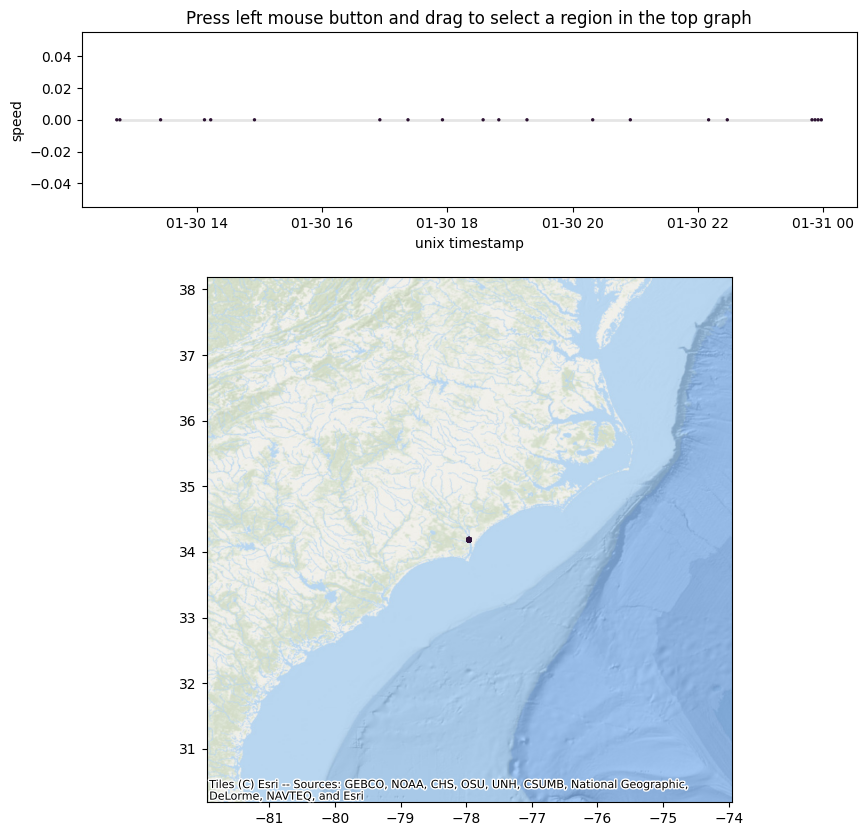

In [13]:
df_at_time = df[df['send'] <= pd.Timestamp('2023-02-02 00:00:00')]
activity, details = classifier.run_pipeline(df_at_time)
print(activity)
amount_of_context_for_visualization = 20
plot_ais_track(df_at_time.tail(amount_of_context_for_visualization))
# Now you can assess the model's performance on this data
